<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/UUI/UUI_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Úvod do Umelej Inteligencie - Google Colab, Rozhodovacie Stromy a Lesy

V rámci dnešného cvičenia si ukážeme ako pracovať v prostredí Google Colab a kresliť jednoduché grafy v Matplotlibe. Potom si ukážeme ako natrénovať rozhodovací strom a následne les.

## Google Colab

Google Colab (http://colab.research.google.com) je nespoplatnená služba na ktorej je možné spúštať tzv. ipython noteboky. Služba poskytuje k dispozícii aj výpočty na GPU a CPU. Pre využitie tejto služby je nutné mať Google účet. Tieto notebooky môžeme spúšťať aj lokálne pomocou príkazu `jupyter notebook` v zložke kde máme uložené ipynb súbory.

V notebookoch máme dva druhy buniek. Textové, ako napr. tento a kód. Bunky s kódom môžeme spúštať tlačidlom play naľavo od bunky, alebo v prostredí Colab naraz od prvej až po poslednú výberom Runtime -> Run All. Defaultne notebook nemá pripojené GPU, to môžeme zmeniť zavolaním Runtime -> Change runtime type. Bunky majú spoločný scope ale je treba dávať pozor na poradie spúštania jednotlivých buniek. Preto je často vhodné použiť Runtime -> Restart and run all.

V nasledujúcej bunke si môžete otestovať spustenie python kódu.

In [ ]:
a = [5,'Hello']
s = '{} World!'
print(s.format(a[1]))

def najlepsia_funkcia(arg):
  return arg + 5

print(najlepsia_funkcia(8))

Hello World!
13


Keď sme v Google Colab chceli by sme mať prístup k súborom. To je najjednoduchšie pomocou pripojenia Google Drive k našej inštancii. To sa robí následovne:
(V Google Drive si vyrobte zložku Colab, alebo upravte na drive)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Môžeme potom k zložke pristupovať.

In [ ]:
import os
os.listdir(root_path)

['mnist-fc-trained.h5', 'cifar-fc-trained.h5']

Takisto môžeme volať unixové príkazy pomocou výkričníka.

In [ ]:
!pwd
!ls
!mkdir random_dir
!ls
!wget https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png
!ls

/content
adult.data    adult.names.1		     googlelogo_color_272x92dp.png.1  random_dir
adult.data.1  gdrive			     play_tennis.csv		      sample_data
adult.names   googlelogo_color_272x92dp.png  play_tennis.csv.1
mkdir: cannot create directory ‘random_dir’: File exists
adult.data    adult.names.1		     googlelogo_color_272x92dp.png.1  random_dir
adult.data.1  gdrive			     play_tennis.csv		      sample_data
adult.names   googlelogo_color_272x92dp.png  play_tennis.csv.1
--2023-12-13 01:16:52--  https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png
Resolving www.google.com (www.google.com)... 74.125.142.103, 74.125.142.147, 74.125.142.99, ...
Connecting to www.google.com (www.google.com)|74.125.142.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5969 (5.8K) [image/png]
Saving to: ‘googlelogo_color_272x92dp.png.2’

googlelogo_color_27 100%[===================>]   5.83K  --.-KB/s    in 0s      

2023-12-13 01:16:52 (99.8 MB/s) - ‘g

Najpohodlnejšia možnosť je použiť inferface naľovo a pozrieť si záložku Files

**<----**

## Matplotlib

Teraz si ukážeme ako vytvoriť jednoduchý graf, ktorý použijeme neskôr v cvičení pomocou knižnice [Matplotlib](https://). Ak by ste chceli použiť komplikovanejšie a krajšie vizualizácie, tak odporúčam knižnicu [Seaborn](https://seaborn.pydata.org). Príklad z nej môžete vidieť aj v [riešení posledného cvičenia](https://github.com/kocurvik/edu/blob/master/RO/cvicenia/notebooky/cv10_en_solution.ipynb) z vyradeného predmetu Rozpoznávanie Obrazcov.

Budeme používať jednoduchý graf s jednou, alebo viacerými krivkami. Vďaka knižnici však môžeme použiť aj komplikovanejšie druhy vizualizácií. Funckia `plt.plot(x, y)` nakreslí krivku z dát `x` a `y` pričom sú to pythonovské listy, alebo NumPy polia. Na zobrazenie musím zavolať `plt.show()`.

In [ ]:
from matplotlib import pyplot as plt

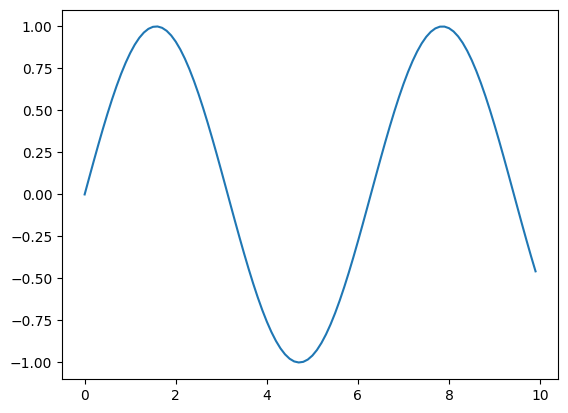

In [ ]:
import math

xs = [0.1 * x for x in range(100)]
ys = [math.sin(x) for x in xs]

plt.plot(xs, ys)
plt.show()

Grafu môžeme zmeniť farbu, alebo ukazovateľe rôznymi spôsobmi. Takisto sa dá pridať aj legenda.

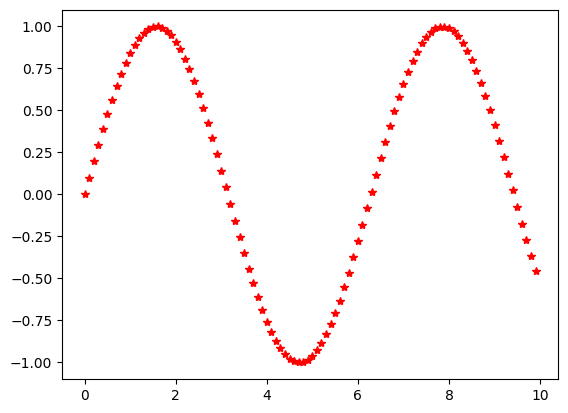

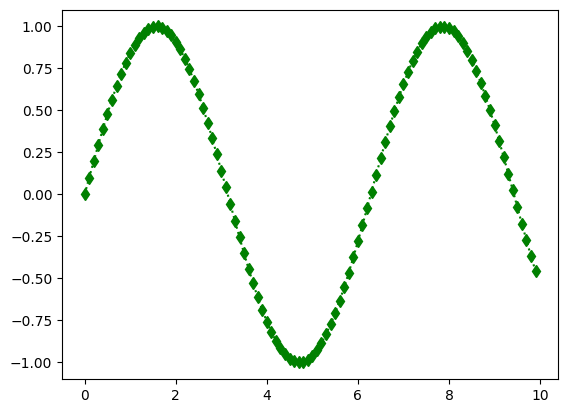

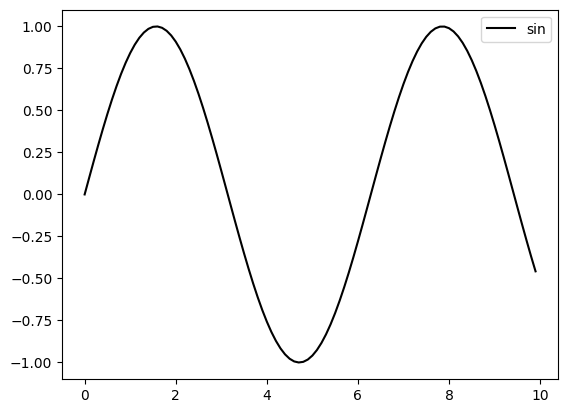

In [ ]:
plt.plot(xs, ys, 'r*')
plt.show()

plt.plot(xs, ys, color='green', marker='d', linestyle=':')
plt.show()

plt.plot(xs, ys, 'k-', label='sin')
plt.legend()
plt.show()

Môžeme kresliť aj viacero čiar do grafu naraz.

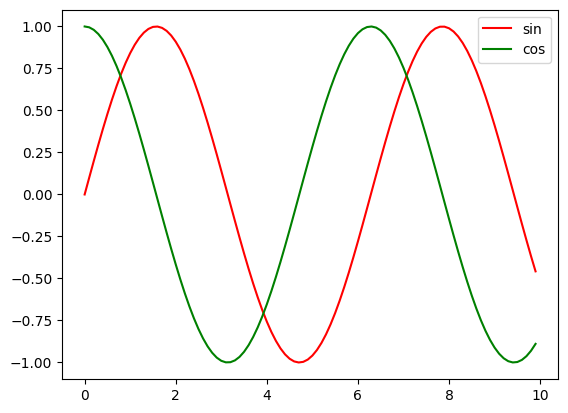

In [ ]:
ys2 = [math.cos(x) for x in xs]

plt.plot(xs, ys, 'r-', label='sin')
plt.plot(xs, ys2, 'g-', label='cos')
plt.legend()
plt.show()

Môžeme meniť aj názov grafu, alebo pozíciu os. Samozrejme aj ďalšie veci, ale tie si viete nájsť v dokumentácii.

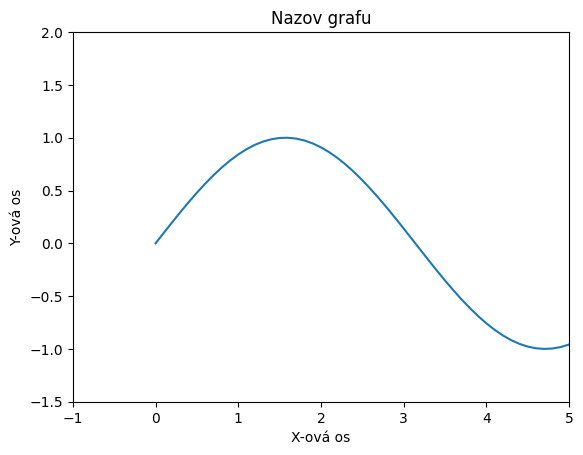

In [ ]:
plt.plot(xs, ys)
plt.ylim([-1.5, 2.0])
plt.xlim([-1, 5])
plt.title("Nazov grafu")
plt.ylabel("Y-ová os")
plt.xlabel("X-ová os")
plt.show()

## Pandas

Pri práci s dátami budeme používať knižnicu pandas. Pri práci s pandasom sú podstatné dve triedy tzv. `Series` a `DataFrame`. My teraz budeme pracovať najmä s `DataFrame`. Tie si vieme predstaviť ako tabuľky s dátami.

Najprv si stiahneme dáta, ktoré sme použili aj na minulej hodine o hraní tenisu. Následne si ich zobrazíme a ukážeme si ako s nimi pracovať.

In [ ]:
!wget https://raw.githubusercontent.com/kocurvik/edu/master/UUI/play_tennis.csv

--2023-12-13 01:16:55--  https://raw.githubusercontent.com/kocurvik/edu/master/UUI/play_tennis.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 456 [text/plain]
Saving to: ‘play_tennis.csv.2’

play_tennis.csv.2   100%[===================>]     456  --.-KB/s    in 0s      

2023-12-13 01:16:55 (9.50 MB/s) - ‘play_tennis.csv.2’ saved [456/456]



In [ ]:
import pandas as pd

df = pd.read_csv('play_tennis.csv')
print('*** Tabuľku si môžeme zobraziť *** \n')
print(df)
print('\n \n')

print('*** Môžeme dostať aj ďalšie informácie ***\n')
df.info()
print('\n \n')

print('*** Mozeme si vypísat aké máme stĺpce ***\n')
df.columns

*** Tabuľku si môžeme zobraziť *** 

    day   outlook  temp humidity    wind play
0    D1     Sunny   Hot     High    Weak   No
1    D2     Sunny   Hot     High  Strong   No
2    D3  Overcast   Hot     High    Weak  Yes
3    D4      Rain  Mild     High    Weak  Yes
4    D5      Rain  Cool   Normal    Weak  Yes
5    D6      Rain  Cool   Normal  Strong   No
6    D7  Overcast  Cool   Normal  Strong  Yes
7    D8     Sunny  Mild     High    Weak   No
8    D9     Sunny  Cool   Normal    Weak  Yes
9   D10      Rain  Mild   Normal    Weak  Yes
10  D11     Sunny  Mild   Normal  Strong  Yes
11  D12  Overcast  Mild     High  Strong  Yes
12  D13  Overcast   Hot   Normal    Weak  Yes
13  D14      Rain  Mild     High  Strong   No

 

*** Môžeme dostať aj ďalšie informácie ***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     object
 1   outl

Index(['day', 'outlook', 'temp', 'humidity', 'wind', 'play'], dtype='object')

Pri práci s tabuľkou niekedy budeme chcieť vybrať len niektoré jej časti. K nim môžeme pristopovať nasledovne:

* Výber jedného stĺpca `df[col]`
* Výber viacerých stĺpcov `df[[col1, col2, ...]]`
* Výber riadku podľa označenia `df.loc[label]`
* Výber riadku podľa poradia `df.iloc[loc]`
* Výber viac riadkov naraz `df[5:10]`
* Výber podľa poľa ktoré obsahuje boolovské hodnoty `df[bool_array]`

*Pozn.:* V prípade tejto tabuľky je použitie `loc` a `iloc` totožné. Pandas však umožňuje mať pre každú tabuľku aj názov daného riadku, ktorý bude iný ako jeho poradie. Mohli sme to tak aj pri načítaní dát spraviť a použiť na to prvý sĺpec.

In [ ]:
print(df['temp'])
print('\n******\n')
print(df[['temp', 'humidity']])
print('\n******\n')
print(df.loc[0])
print('\n******\n')
print(df.iloc[10])
print('\n******\n')
print(df[5:10])
print('\n******\n')
print(df[df['temp'] == 'Cool'])

0      Hot
1      Hot
2      Hot
3     Mild
4     Cool
5     Cool
6     Cool
7     Mild
8     Cool
9     Mild
10    Mild
11    Mild
12     Hot
13    Mild
Name: temp, dtype: object

******

    temp humidity
0    Hot     High
1    Hot     High
2    Hot     High
3   Mild     High
4   Cool   Normal
5   Cool   Normal
6   Cool   Normal
7   Mild     High
8   Cool   Normal
9   Mild   Normal
10  Mild   Normal
11  Mild     High
12   Hot   Normal
13  Mild     High

******

day            D1
outlook     Sunny
temp          Hot
humidity     High
wind         Weak
play           No
Name: 0, dtype: object

******

day            D11
outlook      Sunny
temp          Mild
humidity    Normal
wind        Strong
play           Yes
Name: 10, dtype: object

******

   day   outlook  temp humidity    wind play
5   D6      Rain  Cool   Normal  Strong   No
6   D7  Overcast  Cool   Normal  Strong  Yes
7   D8     Sunny  Mild     High    Weak   No
8   D9     Sunny  Cool   Normal    Weak  Yes
9  D10      Rain  Mi

## Rozhodovací strom

Teraz použijeme knižnicu Scikit-Learn na to aby sme natrénovali na týchto dátach rozhodovací strom. Následne budete mať za úlohu si strom natrénovať na iných dátach.

Predtým než budeme pracovať s dátami si ich musíme trocha upraviť. Rozhodovacie stromy v scikit-learn nevedia pracovať priamo s kategorickými dátami. Preto si z každého stĺpca kde máme dve možné kategórie vyrobíme stĺpec, ktorý bude mať len nuly a jednotky označujúci dané kategórie. Pre stĺpce `outlook` a `temp` s troma kategóriami si vytvoríme 3 stĺpce v ktorých bude jednotka vždy tam kde naozaj bola daná kategória a nula všade inde. Podobne aj kategórie na výstupe musíme rozdeliť.

X: 
    outlook_Overcast  outlook_Rain  outlook_Sunny  temp_Cool  temp_Hot  \
0                  0             0              1          0         1   
1                  0             0              1          0         1   
2                  1             0              0          0         1   
3                  0             1              0          0         0   
4                  0             1              0          1         0   
5                  0             1              0          1         0   
6                  1             0              0          1         0   
7                  0             0              1          0         0   
8                  0             0              1          1         0   
9                  0             1              0          0         0   
10                 0             0              1          0         0   
11                 1             0              0          0         0   
12                 1             0

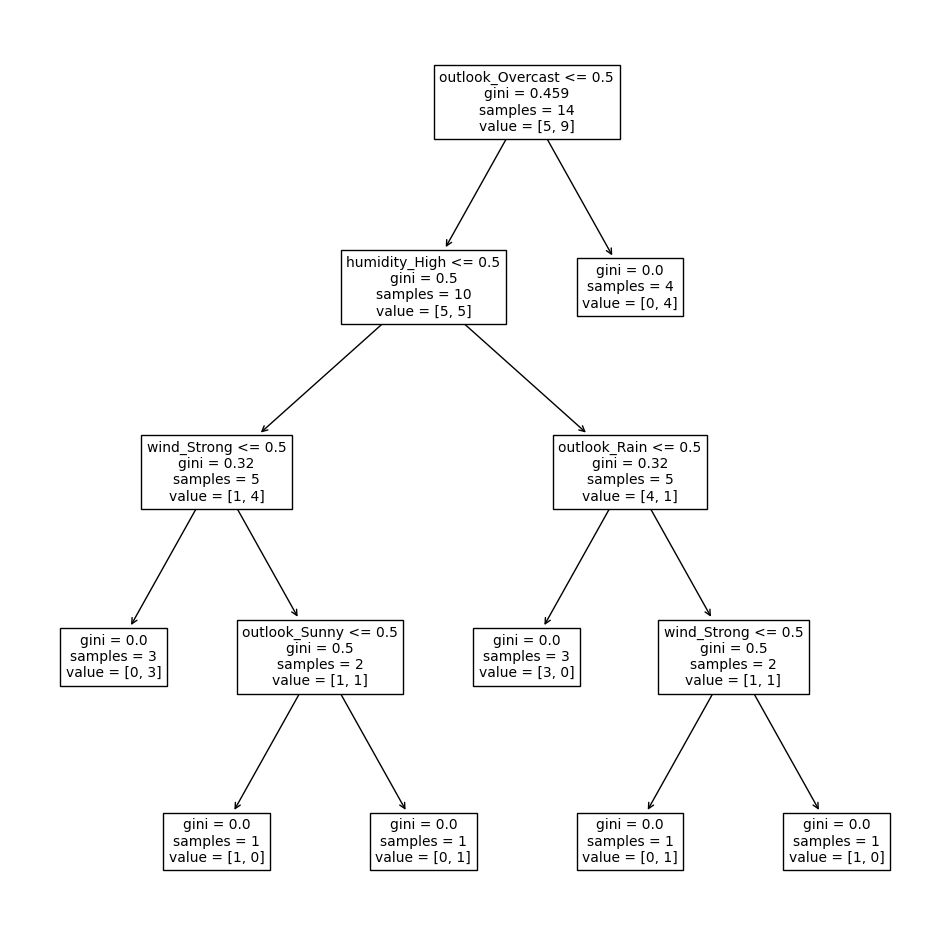

In [ ]:
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

def prepare_data(X):
  cat_ix = X.select_dtypes(include=['object', 'bool']).columns
  for cat in cat_ix:
    one_hot = pd.get_dummies(X[cat], prefix=cat)
    X = X.drop(cat, axis='columns')
    if len(one_hot.columns) > 2:
      X = X.join(one_hot)
    else:
      X = X.join(one_hot.iloc[:, 0])

  return X

def prepare_labels(y):
  le = LabelEncoder()
  y = le.fit_transform(y)
  return y

# pripravíme si vstupné dáta
X = prepare_data(df[['outlook', 'temp', 'humidity', 'wind']])
print("X: ")
print(X)

y = prepare_labels(df['play'])
print("Y: ")
print(y)

# strom natrénujeme
cls = tree.DecisionTreeClassifier()
cls.fit(X, y)

# strom nakreslíme
plt.figure(figsize=(12, 12)) # týmto si len nastavíme väčšie plátno aby sa strom pekne vykreslil celý
_ = tree.plot_tree(cls, feature_names=X.columns, fontsize=10)

Ak máme strom tak ho môžeme použiť na predikciu. Môžeme si napríklad vymyslieť rôzne scenáre, alebo môžeme zistiť ako sa zachová klasifikátor na trénovacích dátach.

In [ ]:
from sklearn.metrics import accuracy_score

x1 = {'outlook_Overcast': 0, 'outlook_Rain': 0, 'outlook_Sunny': 1, 'temp_Cool': 0, 'temp_Hot': 1, 'temp_Mild': 0, 'humidity_High': 1, 'wind_Strong': 0}
x2 = {'outlook_Overcast': 0, 'outlook_Rain': 1, 'outlook_Sunny': 0, 'temp_Cool': 1, 'temp_Hot': 0, 'temp_Mild': 0, 'humidity_High': 1, 'wind_Strong': 1}
x3 = {'outlook_Overcast': 1, 'outlook_Rain': 0, 'outlook_Sunny': 0, 'temp_Cool': 0, 'temp_Hot': 1, 'temp_Mild': 0, 'humidity_High': 1, 'wind_Strong': 1}

pred = cls.predict(pd.DataFrame([x1, x2, x3]))
print("Predikcie: ", pred)

pred = cls.predict(X)
print("Predikcie na trénovacích dátach: ", pred)

print("Presnosť na trénovacích dátach: ", 100 * accuracy_score(y, pred), '%')

Predikcie:  [0 0 1]
Predikcie na trénovacích dátach:  [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
Presnosť na trénovacích dátach:  100.0 %


Perfektná presnosť na trénovacích dátach je očakávaná. Avšak, čo ak sa obmedzíme na plytší strom?

Predikcie na trénovacích dátach:  [0 0 1 0 1 1 1 0 1 1 1 1 1 0]
Presnosť na trénovacích dátach:  85.71428571428571 %


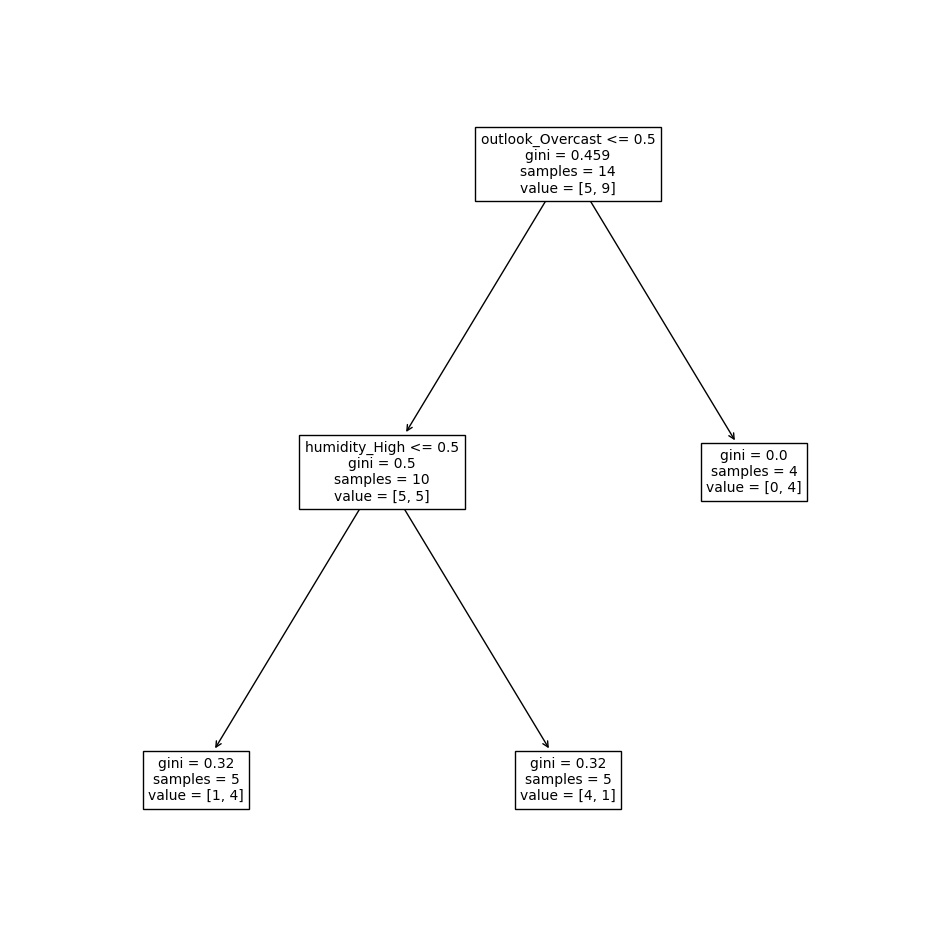

In [ ]:
cls = tree.DecisionTreeClassifier(max_depth=2)
cls.fit(X, y)
plt.figure(figsize=(12, 12))
_ = tree.plot_tree(cls, feature_names=X.columns, fontsize=10)

pred = cls.predict(X)
print("Predikcie na trénovacích dátach: ", pred)
print("Presnosť na trénovacích dátach: ", 100 * accuracy_score(y, pred), '%')

### Úloha 1 - Iné dáta

Teraz si načítame dáta so sčítania obyvateľov z roku 1994. Našim cieľom bude klasifikovať, či daný človek zarobil v minulom roku viac ako 50 tisíc dolárov. Prí načítaní dát postupujeme podobne ako predtým, ale tento krát si zároveň dáta rozdelíme na trénovacie, validačné a testovacie.

Natrénujte rozhodovací strom na trénovacích dátach a potom vyhodnoťte presnosť na testovacích dátach.

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
!tail -n 16 adult.names

--2023-12-13 01:17:02--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘adult.data.2’

adult.data.2            [  <=>               ]   3.79M  16.1MB/s    in 0.2s    

2023-12-13 01:17:03 (16.1 MB/s) - ‘adult.data.2’ saved [3974305]

--2023-12-13 01:17:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘adult.names.2’

adult.names.2           [ <=>                ]   5.11K  --.-KB/s    in 0s      

2023-12-13 01:17:03 (61.6 MB/s) - ‘adult.names.2’ saved [5229]

In [ ]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('adult.data', names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary'], sep=",")
print("Načítané dáta:")
print(data.head())

print('\n ************* \n')

data_X = data.drop('salary', axis='columns')
data_y = data['salary']

X = prepare_data(data_X)
y = prepare_labels(data_y)
print("Dáta po úprave: ")
print(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

Načítané dáta:
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  salary  
0          2174             0              40   Unite

In [ ]:
# natrénujte storm a vyhodnotte jeho presnosť na testovacích dátach
cls = tree.DecisionTreeClassifier()
cls.fit(X_train, y_train)

pred = cls.predict(X_test)
print("Presnosť na testovacích dátach: ", 100 * accuracy_score(y_test, pred), '%')

Presnosť na testovacích dátach:  80.57730692461232 %


### Úloha 2 - Testovanie rôznych hĺbok stromu

Teraz si skúsime zistiť optimálnu hĺbku stromu. Postupne testujte všetky hĺbky stromu od 1 až po 50. Vždy strom natrénujte na trénovacích dátach a zistite potom presnosť na validačných dátach. Potom zobrazte krivku kde na x-ovej ose bude hĺbka stromu a na y-ovej presnosť na validačných dátach. Následne vyberte najlepšiu hodnotu a vyhodnotte presnosť na validačných dátach.

Výsledný strom zobrazte.

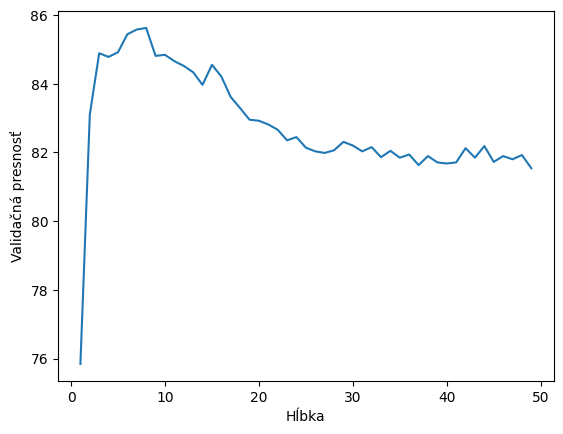

Maximálna presnosť: 85.62653562653563 % 	 pre hĺbku: 8


In [ ]:
depths = list(range(1, 50))
accs = []

for d in depths:
  dtc = tree.DecisionTreeClassifier(max_depth=d)
  dtc.fit(X_train, y_train)
  pred = dtc.predict(X_val)
  accs.append(100 * accuracy_score(y_val, pred))

plt.plot(depths, accs)
plt.xlabel('Hĺbka')
plt.ylabel('Validačná presnosť')
plt.show()

best_d = depths[max(range(len(accs)), key=lambda x: accs[x])]
print("Maximálna presnosť:", max(accs), "% \t pre hĺbku:", best_d)

Testovacia presnosť:  80.4544756640565 %


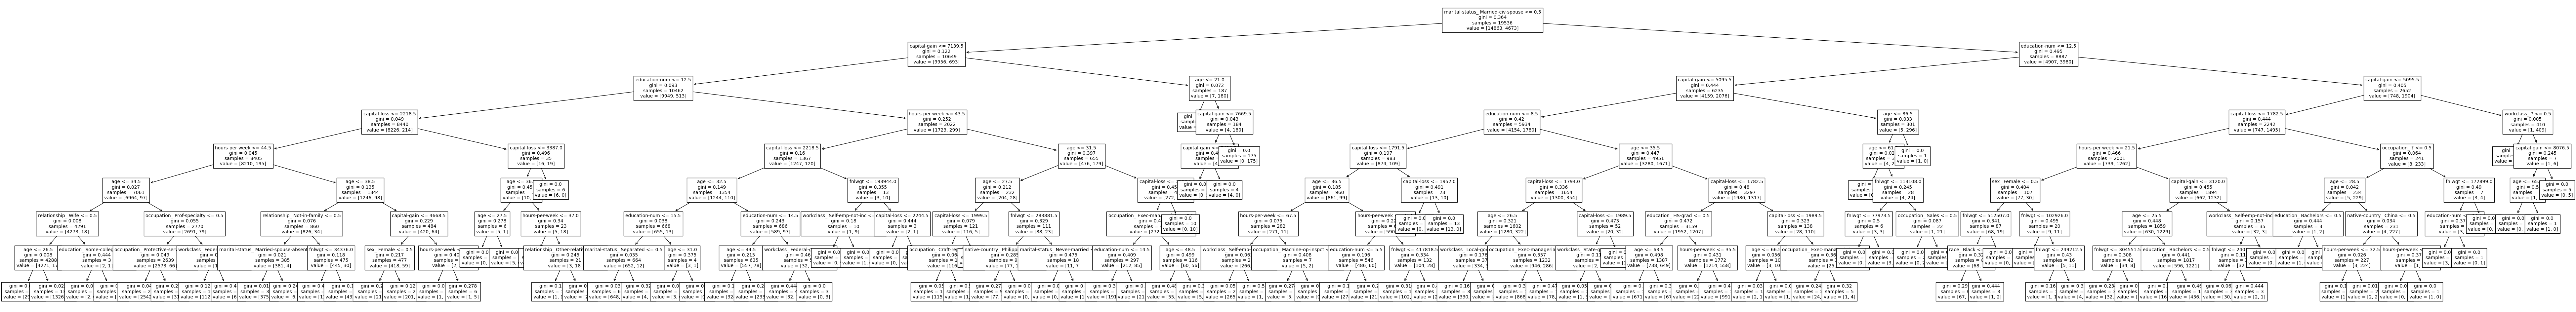

In [ ]:
cls = tree.DecisionTreeClassifier(max_depth=best_d)
cls.fit(X_train, y_train)
pred = dtc.predict(X_test)
print("Testovacia presnosť: ", 100*accuracy_score(y_test, pred), "%")

plt.figure(figsize=(100, 12))
_ = tree.plot_tree(cls, feature_names=X.columns, fontsize=10)

## Náhodné lesy

Náhodné lesy fungujú ako názov napovedá ako množina stromov. Pre rozhodnutie o triede každý strom hlasuje a vyhrá trieda s najviac hlasmi. Jednotlivé stromy získame tak, že vždy zoberieme náhodnú podmnožinu trénovacích dát.

### Úloha 3 - Náhodný les a hĺbka

Skúste natrénovať náhodný les. Postup je skoro ronvaký ako pri `DecisionTreeClassifier` až na to že budeme používať triedu [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Skúste vygenerovať rovnaký graf ako pri predchádzajúcej úlohe. Otestujte len hĺbky $5, 10, 15, ..., 40$.

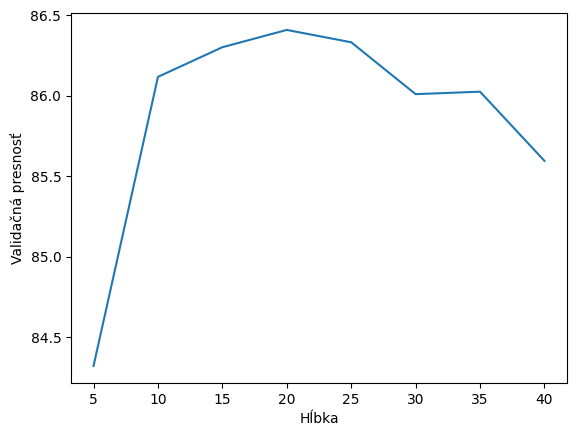

Maximálna presnosť: 86.40970515970517 % 	 pre hĺbku: 20
Testovacia presnosť:  84.84569322892676 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier

depths = list(range(5, 41, 5))
accs = []

for d in depths:
  dtc = RandomForestClassifier(max_depth=d)
  dtc.fit(X_train, y_train)
  pred = dtc.predict(X_val)
  accs.append(100 * accuracy_score(y_val, pred))

plt.plot(depths, accs)
plt.xlabel('Hĺbka')
plt.ylabel('Validačná presnosť')
plt.show()

best_d = depths[max(range(len(accs)), key=lambda x: accs[x])]
print("Maximálna presnosť:", max(accs), "% \t pre hĺbku:", best_d)

cls = RandomForestClassifier(max_depth=best_d)
cls.fit(X_train, y_train)
pred = dtc.predict(X_test)
print("Testovacia presnosť: ", 100*accuracy_score(y_test, pred), "%")

### Úloha 4 - Stromy v Lese

Ak máme objekt triedy `RandomForestClassifier`, tak môžeme pristupovať k jednotlivým stromom cez jeho atribút `.estimators_`

Napíšte for cyklus ktorý bude vypisovať presnosť na testovacích dátach pre jednotlivé stromy z náhodného lesa, ktorý sme dostali v minulej úlohe.

In [ ]:
# budeme ignorovat varovanie z tejto issue: https://github.com/scikit-learn/scikit-learn/issues/26140
import warnings
warnings.filterwarnings('ignore')

for i, t in enumerate(cls.estimators_):
  pred = t.predict(X_test)
  print(f"Testovacia presnosť pre strom {i}: {100*accuracy_score(y_test, pred)}%")

Testovacia presnosť pre strom 0: 81.48318747121142%
Testovacia presnosť pre strom 1: 81.82097343773991%
Testovacia presnosť pre strom 2: 82.92645478274221%
Testovacia presnosť pre strom 3: 81.42177184093352%
Testovacia presnosť pre strom 4: 81.63672654690619%
Testovacia presnosť pre strom 5: 81.114693689544%
Testovacia presnosť pre strom 6: 81.97451251343468%
Testovacia presnosť pre strom 7: 81.45247965607247%
Testovacia presnosť pre strom 8: 81.98986642100414%
Testovacia presnosť pre strom 9: 81.06863196683555%
Testovacia presnosť pre strom 10: 83.54061108552126%
Testovacia presnosť pre strom 11: 81.60601873176724%
Testovacia presnosť pre strom 12: 81.08398587440504%
Testovacia presnosť pre strom 13: 83.29494856440964%
Testovacia presnosť pre strom 14: 81.42177184093352%
Testovacia presnosť pre strom 15: 82.05128205128204%
Testovacia presnosť pre strom 16: 81.59066482419776%
Testovacia presnosť pre strom 17: 81.39106402579456%
Testovacia presnosť pre strom 18: 81.06863196683555%
Testo